<a href="https://colab.research.google.com/github/ShanxuLi/main/blob/main/Implementation_of_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI FOR ACCELERATED MATERIALS MODELING AND DESIGN​
# Week 4 (Nov 9): Supervised Learning in Materials Science

### Implementing Gradient Descent Algorithm from Scratch

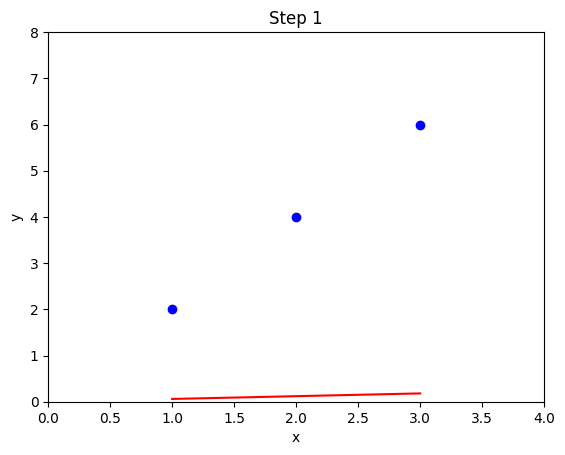

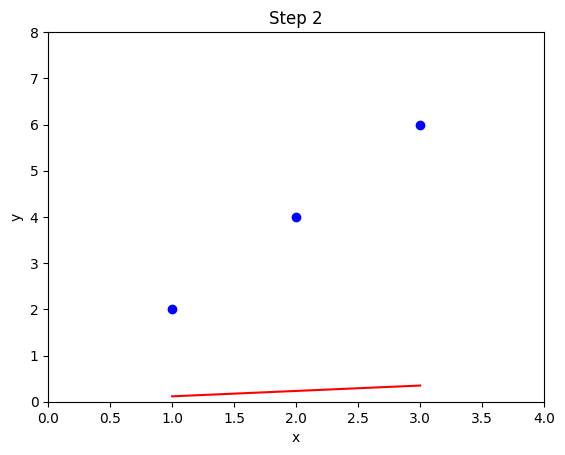

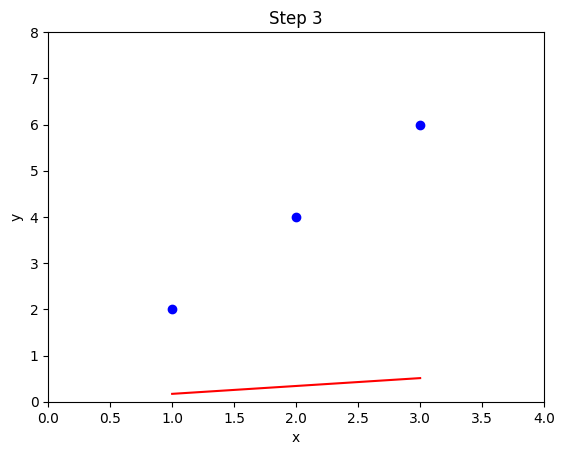

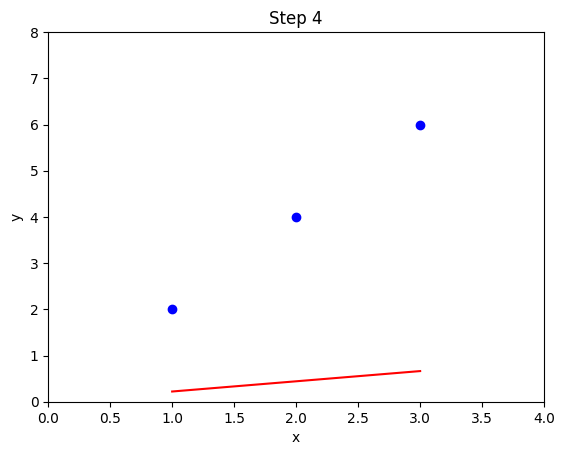

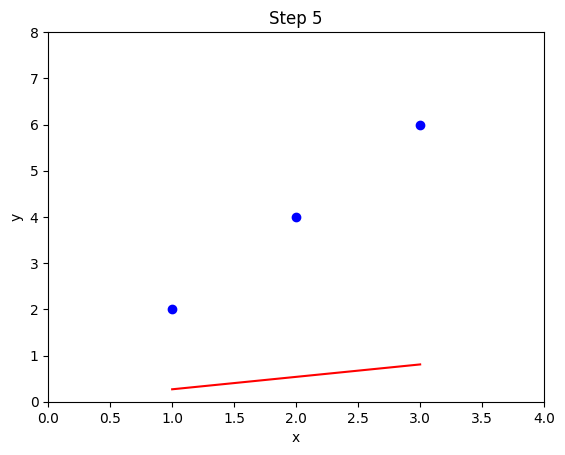

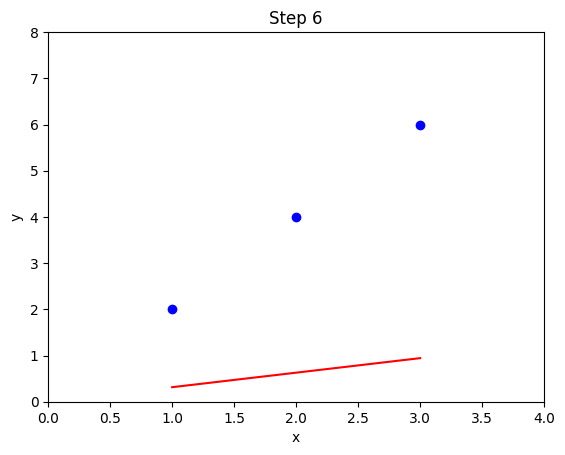

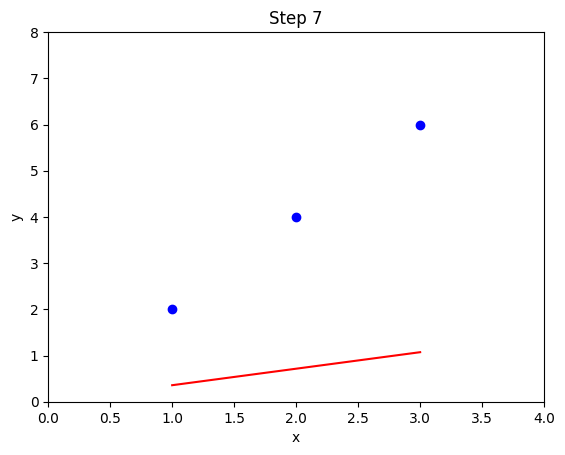

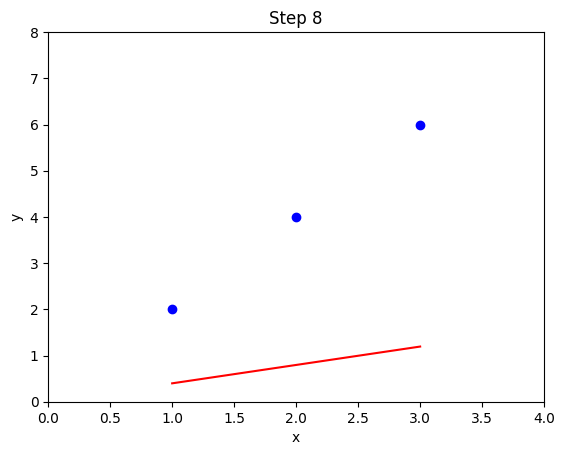

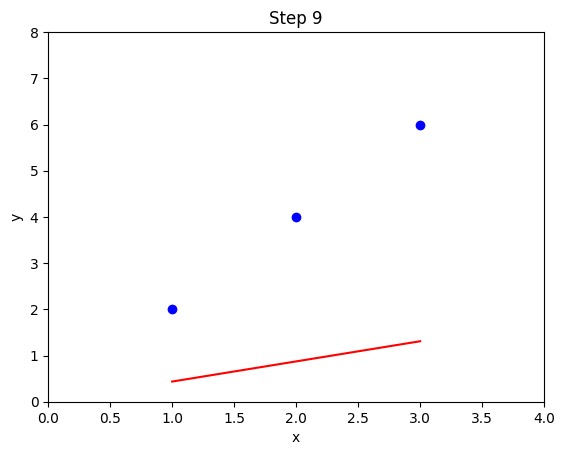

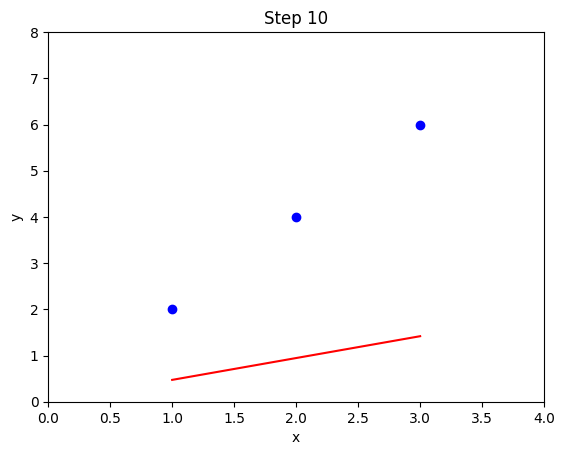

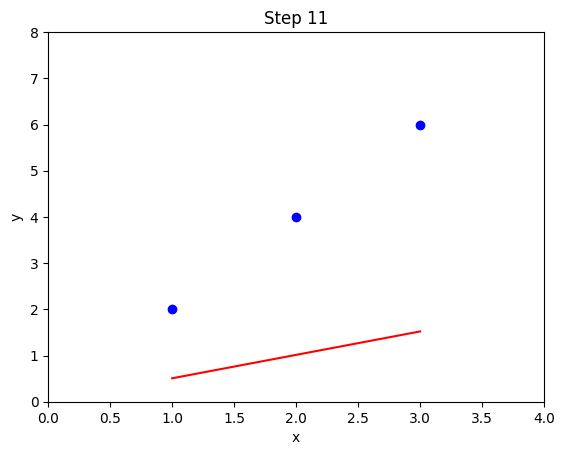

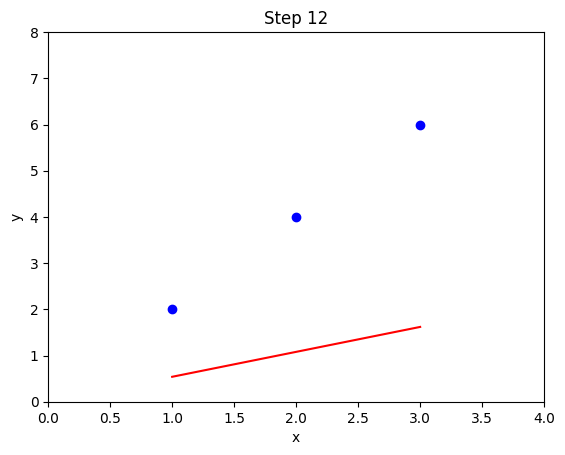

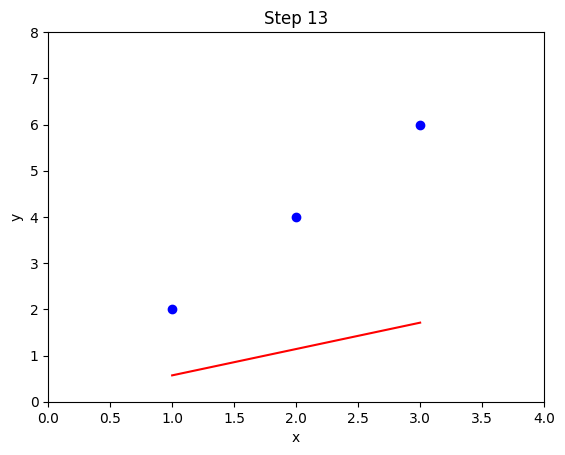

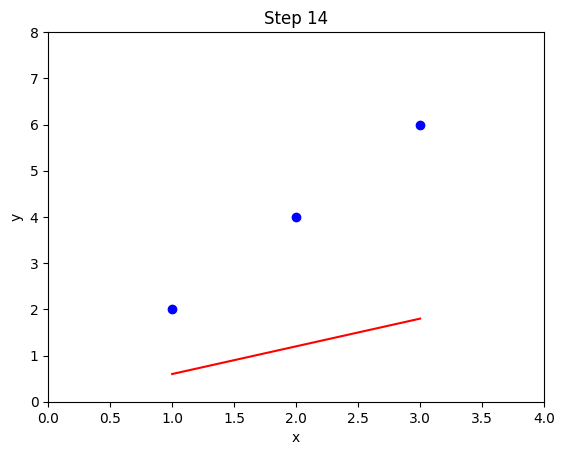

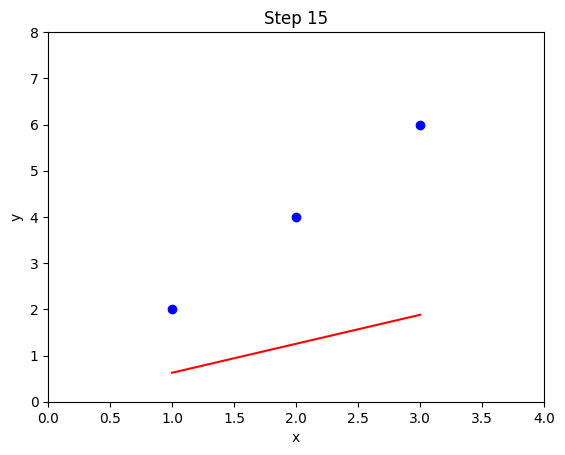

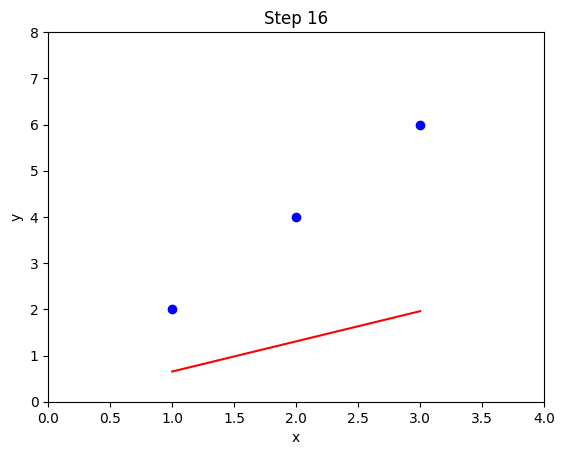

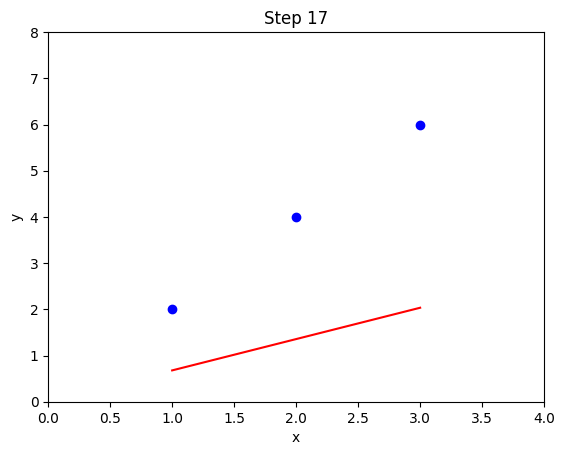

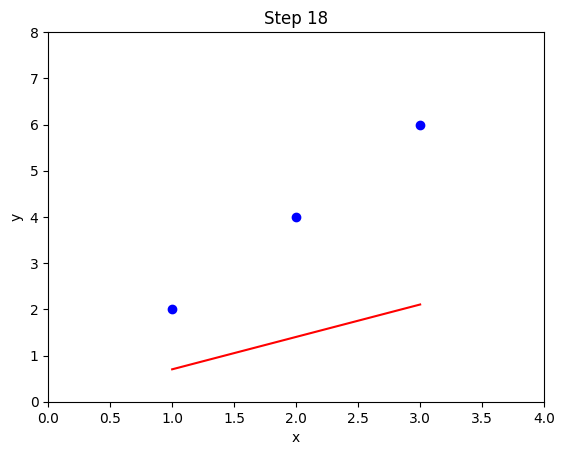

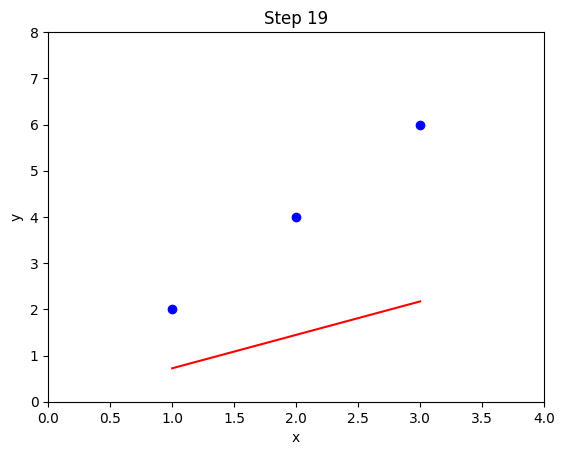

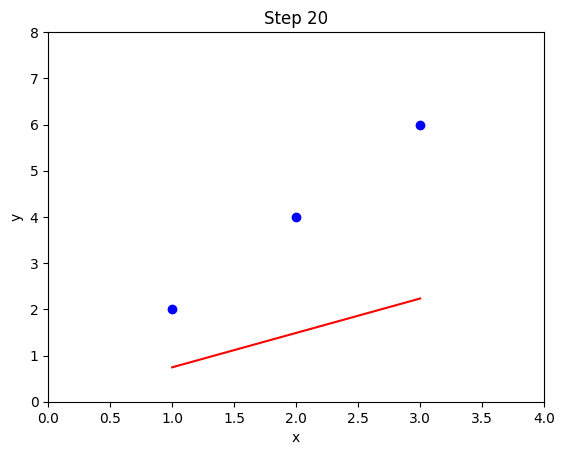

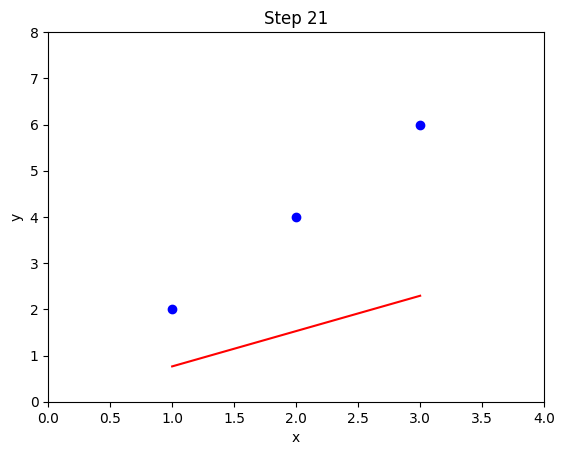

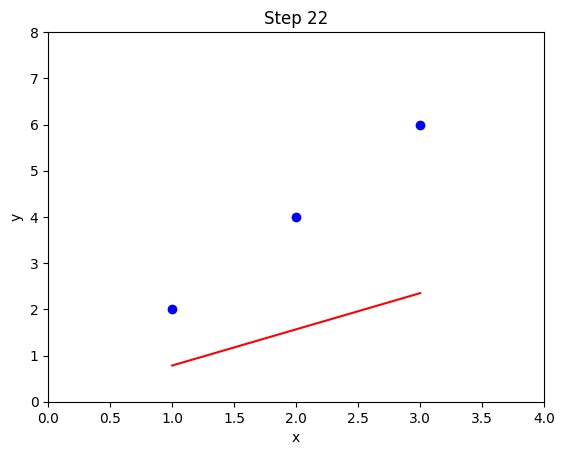

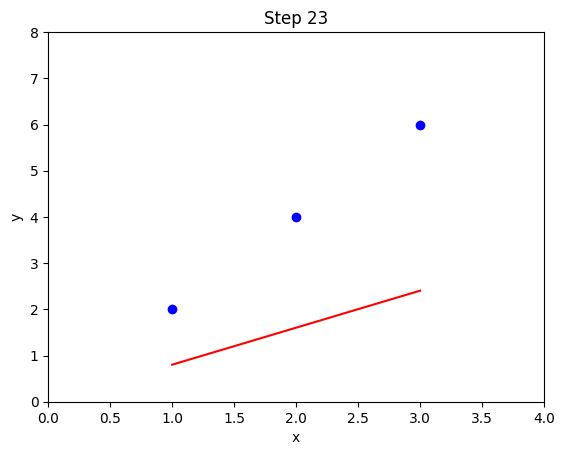

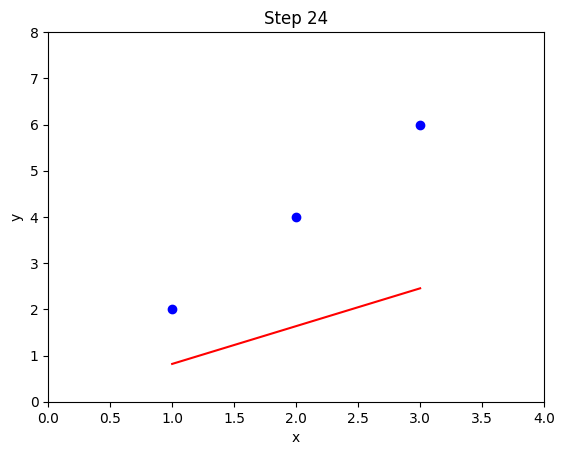

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3])
y = np.array([2, 4, 6])

# Add a bias term (x0 = 1) to every instance
X_b = np.c_[np.ones((3, 1)), x]  #ONES(M,N) is an M arrays* N colomns matrix of all values=1.

# Define the cost function (SSE)
def compute_cost(theta, X, y): #theta(i): the weights
    m = len(y)
    predictions = X.dot(theta) #dot() returns the dot product of two vectors, x and y. i.e., x[0]⋅y[0]+x[1]⋅y[1]+...
    cost = (1/2*m) * np.sum(np.square(predictions - y)) #SSE: cost
    return cost

# Implement the gradient descent algorithm #intro: https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Introduction,e.g.%20in%20a%20linear%20regression).
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)  #zero(): create an M*N array with values 0
    theta_history = np.zeros((num_iterations, 2))

    for i in range(num_iterations):
        gradients = 1/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients

        # Save the theta values for plotting
        theta_history[i, :] = theta.T[0]
        cost_history[i] = compute_cost(theta, X, y)

        # Plot the data along with the regression line for every step
        plt.scatter(x, y, color='blue')
        order = np.argsort(x)
        plt.plot(x[order], X_b.dot(theta).flatten()[order], color='red') #flatten(): to convert a multi-dimensional array into a one-dimensional array

        plt.title(f"Step {i+1}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 4)
        plt.ylim(0, 8)
        plt.pause(0.5)
        if i != num_iterations - 1:   #!=: A not equal to B
            plt.clf()

    return theta, cost_history, theta_history

initial_theta = np.zeros((2, 1))  # Initialize theta to zeros
learning_rate = 0.01  # Reduce learning rate
num_iterations = 200  # Increase iterations

theta, cost_history, theta_history = gradient_descent(X_b, y, initial_theta, learning_rate, num_iterations)

plt.show()


# Problem Statement

We're researching organic molecules for their potential use in organic electronics. The effectiveness of an organic molecule in these applications can often be determined by a metric known as the "band gap energy." Using density functional theory (DFT), we can predict the band gap energy of these molecules based on certain attributes. Our goal is to develop a linear regression model that uses these attributes to predict the band gap energy.

## Attributes:

- **Molecular Weight**: (in atomic mass units)
- **Number of Double Bonds**
- **Number of Rings**
- **Polarizability**: (in Å³)

## Target Variable:

- **Band Gap Energy**: (in eV)

# Data Generation

We'll generate synthetic data for 1000 organic molecules. To ensure some level of correlation, we'll use linear combinations of the attributes to determine the band gap energy, with added noise.


# 1. Importing Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


# 2. Generating Synthetic Data


In [ ]:
import numpy as np
import pandas as pd

# Setting seed for reproducibility
np.random.seed(42)

# Generating random data for the attributes
n_samples = 1000

molecular_weight = np.random.normal(200, 40, n_samples)
double_bonds = np.random.poisson(3, n_samples)
rings = np.random.poisson(2, n_samples)
polarizability = np.random.normal(20, 5, n_samples)

# Generating the band gap energy based on the attributes, with added noise
noise = np.random.normal(0, 0.5, n_samples)
band_gap_energy = 10 - 0.02 * molecular_weight + 0.5 * double_bonds - 0.4 * rings - 0.03 * polarizability + noise

#pd.DataFrame(): to createa a 2D array, or a table with rows and columns
data = pd.DataFrame({
    'Molecular Weight': molecular_weight,
    'Double Bonds': double_bonds,
    'Rings': rings,
    'Polarizability': polarizability,
    'Band Gap Energy': band_gap_energy
})

# Displaying the top rows of the dataframe
data.head()


,Molecular Weight,Double Bonds,Rings,Polarizability,Band Gap Energy
0,219.868566,1,1,24.513301,4.264589
1,194.469428,2,2,18.366013,5.840823
2,225.907542,1,1,11.826532,4.612681
3,260.921194,7,2,14.797950,7.052711
4,190.633865,6,2,17.401126,8.446293


# 3. Data Visualization


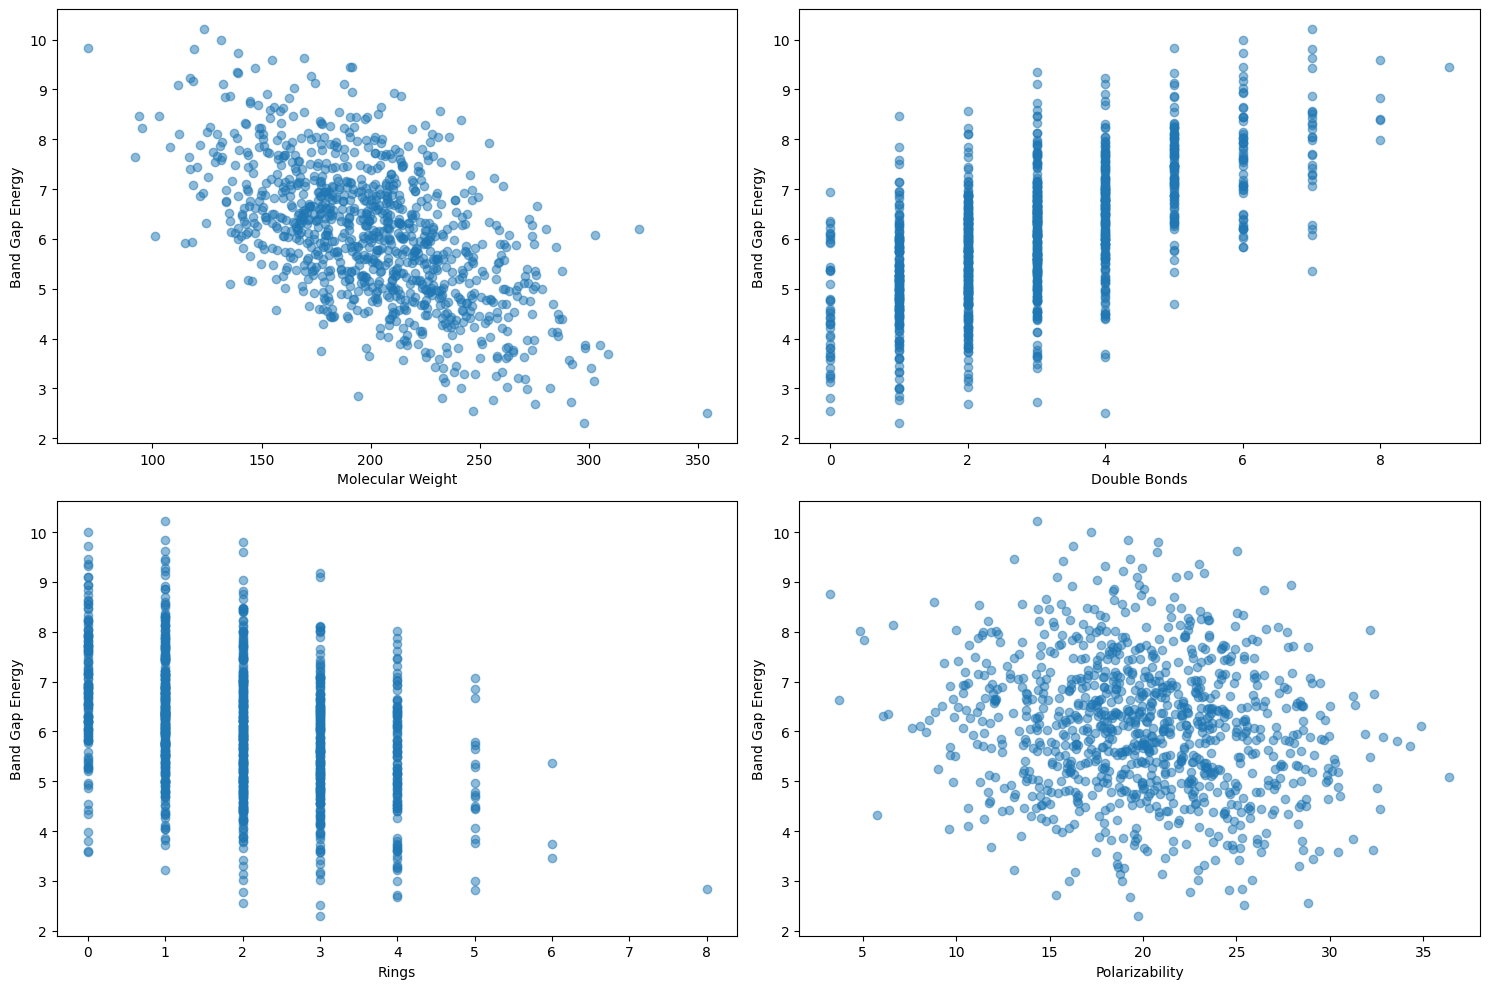

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(data['Molecular Weight'], data['Band Gap Energy'], alpha=0.5)
axs[0, 0].set_xlabel('Molecular Weight')
axs[0, 0].set_ylabel('Band Gap Energy')

axs[0, 1].scatter(data['Double Bonds'], data['Band Gap Energy'], alpha=0.5)
axs[0, 1].set_xlabel('Double Bonds')
axs[0, 1].set_ylabel('Band Gap Energy')

axs[1, 0].scatter(data['Rings'], data['Band Gap Energy'], alpha=0.5)
axs[1, 0].set_xlabel('Rings')
axs[1, 0].set_ylabel('Band Gap Energy')

axs[1, 1].scatter(data['Polarizability'], data['Band Gap Energy'], alpha=0.5)
axs[1, 1].set_xlabel('Polarizability')
axs[1, 1].set_ylabel('Band Gap Energy')

plt.tight_layout()
plt.show()


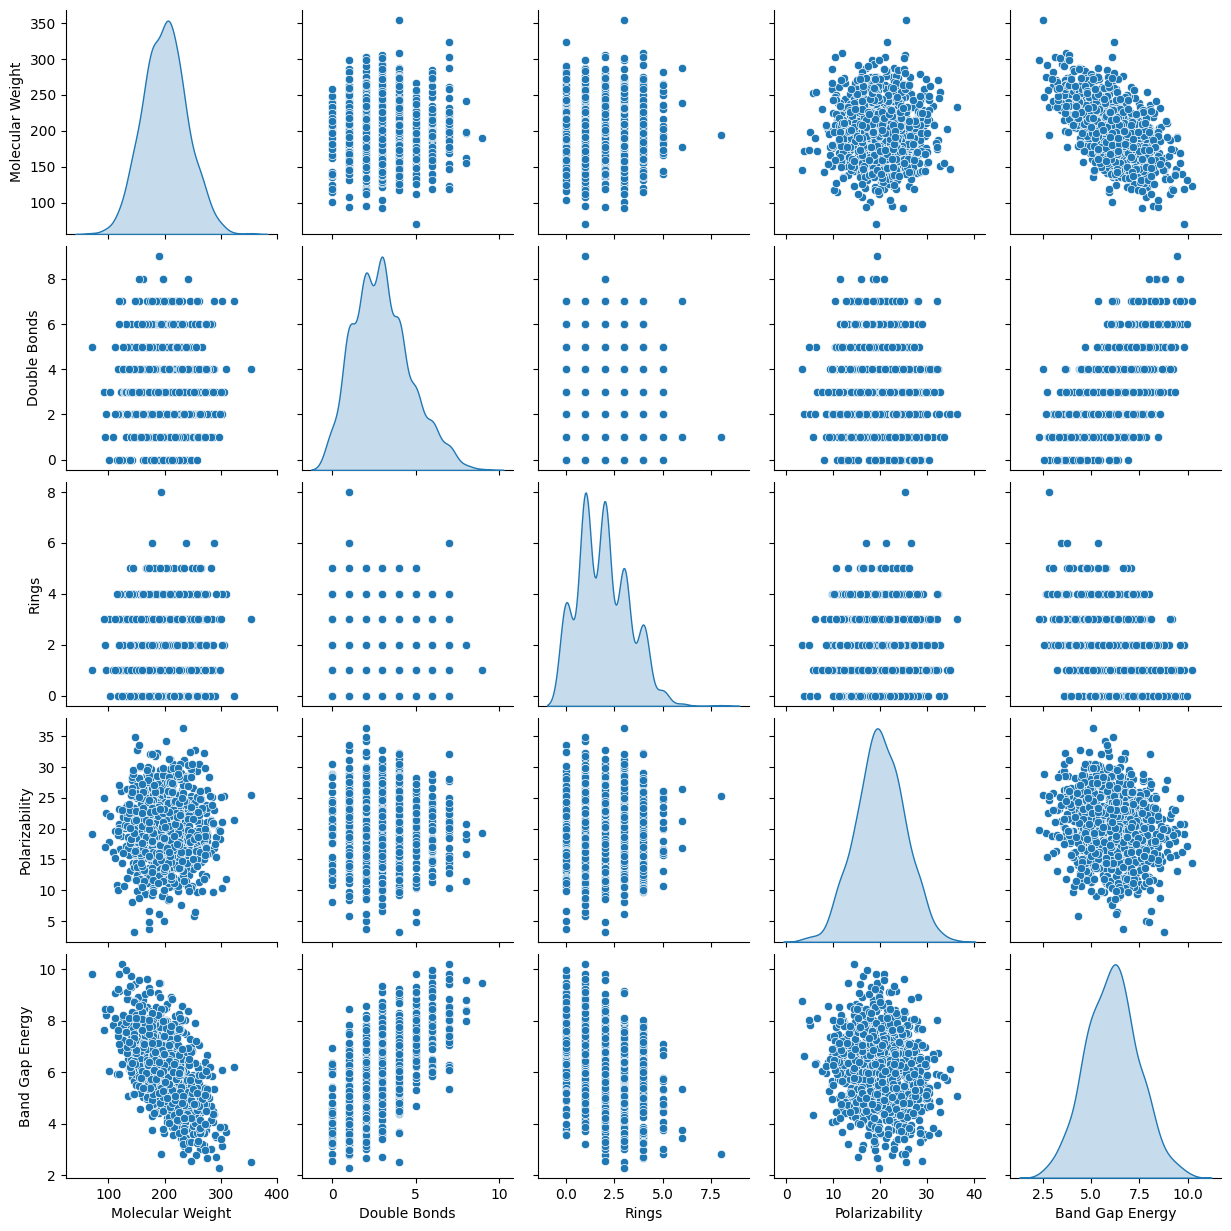

In [ ]:
sns.pairplot(data, diag_kind='kde') #from Seaborn Library, scatterplots showing the relationships between variables with using Kernel Density Esitimate
plt.show()


# 4. Splitting the Data

In [ ]:
X = data.drop('Band Gap Energy', axis=1)
y = data['Band Gap Energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Multiple Linear Regression and Cross-Validation


In [ ]:
model = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
cross_val_scores = np.sqrt(-cross_val_scores)

print(f'Cross-validated RMSE: {cross_val_scores.mean():.3f} ± {cross_val_scores.std():.3f}')


Cross-validated RMSE: 0.518 ± 0.047


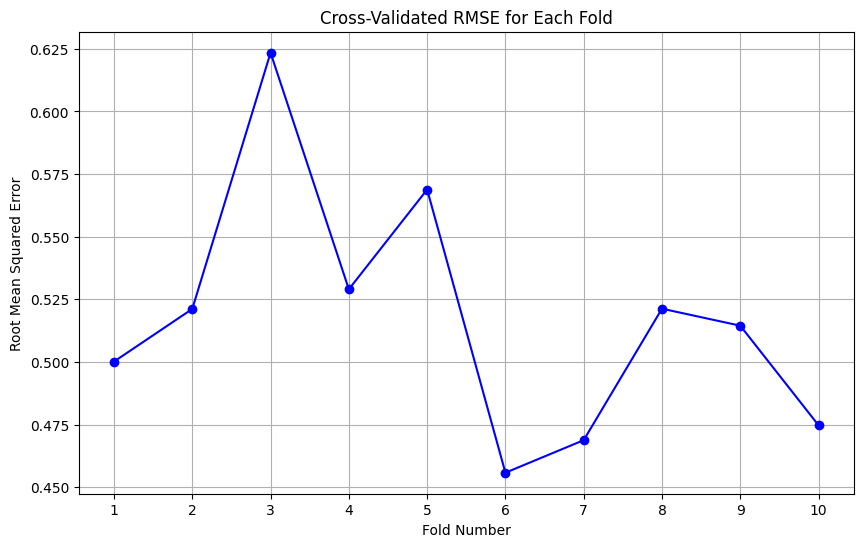

In [ ]:
def plot_rmse_for_each_fold(cross_val_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cross_val_scores) + 1), cross_val_scores, '-o', color='blue')
    plt.xlabel("Fold Number")
    plt.ylabel("Root Mean Squared Error")
    plt.title("Cross-Validated RMSE for Each Fold")
    plt.xticks(range(1, len(cross_val_scores) + 1))
    plt.grid(True)
    plt.show()

plot_rmse_for_each_fold(cross_val_scores)

# 6. Model Evaluation


Test RMSE: 0.500


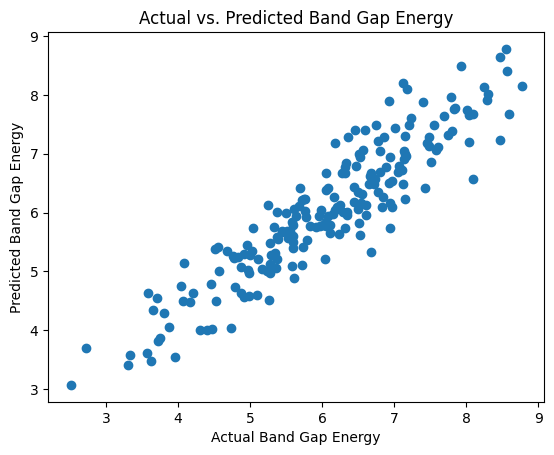

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.3f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Band Gap Energy")
plt.ylabel("Predicted Band Gap Energy")
plt.title("Actual vs. Predicted Band Gap Energy")
plt.show()


# Regression Types

---

## Linear Regression
- **Goal**: Minimize the sum of squared differences between the observed and estimated values.
- **Equation**: `y = β0 + β1X1 + β2X2 + ... + βnXn`
- **Regularization**: None

**Notes**:
- Simple and interpretable.
- Can overfit on datasets with many features.

---

## Ridge Regression (L2 regularization)
- **Goal**: Minimize the sum of squared differences and the magnitude of coefficients.
- **Equation**: `y = β0 + β1X1 + β2X2 + ... + βnXn + λ∑βi^2`
- **Regularization**: Squared magnitude of coefficients.

**Notes**:
- Regularization term discourages overly large coefficients.
- Can't set coefficients to absolute zero - will always include all predictors.

---

## Lasso Regression (L1 regularization)
- **Goal**: Minimize the sum of squared differences and the absolute value of the coefficients.
- **Equation**: `y = β0 + β1X1 + β2X2 + ... + βnXn + λ∑|βi|`
- **Regularization**: Absolute value of the magnitude of coefficients.

**Notes**:
- Can set coefficients to zero, effectively selecting more relevant features.
- Provides feature selection out of the box.
